In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, glob

In [3]:
# load defa metrics

csvs = ['evaluation_metrics_5y_test.csv', 'evaluation_metrics_Ally_test.csv',
        'evaluation_metrics_train.csv', 'evaluation_metrics_ally.csv'] # 5y test period, all year test (no train period), train, all years

df_defa = []
for basin in range(627):
    pathb = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/LongTermSimu/Defa/level1_{basin}/'
    files = [f'{pathb}/{c}' for c in csvs]
    dfb = pd.concat(map(pd.read_csv, files))
    dfb['basin'] = basin
    dfb['eval'] = ['test_5y', 'test_ally', 'train', 'ally']
    dfb['param'] = 'Defa'
    df_defa.append(dfb)
df_defa = pd.concat(df_defa)

In [44]:
# load optmz metrics
df_optmz = []
for basin in range(627):
    pathb = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/LongTermSimu/LSEallbasin/level1_{basin}/normKGEr1'
    files = [f'{pathb}/{c}' for c in csvs]
    if not os.path.isfile(files[0]):
        print('Warning! File does not exist for', basin)
        dfb = dfb.copy()
        dfb[:]=np.nan
        dfb['basin'] = basin
        dfb['eval'] = ['test_5y', 'test_ally', 'train', 'ally']
        dfb['param'] = 'normKGEr1'
    else:
        dfb = pd.concat(map(pd.read_csv, files))
        dfb['basin'] = basin
        dfb['eval'] = ['test_5y', 'test_ally', 'train', 'ally']
        dfb['param'] = 'normKGEr1'
    df_optmz.append(dfb)
df_optmz = pd.concat(df_optmz)

Warning! File does not exist for 329


/glade/derecho/scratch/guoqiang/tmp/ipykernel_36203/2284419156.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfb[:]=np.nan
/glade/derecho/scratch/guoqiang/tmp/ipykernel_36203/2284419156.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfb[:]=np.nan
/glade/derecho/scratch/guoqiang/tmp/ipykernel_36203/2284419156.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfb[:]=np.nan


In [11]:
# merge them into one df
df_all = pd.concat([df_defa, df_optmz])

# Comparison

In [45]:
# train vs test
print('Defa')
for e in ['test_5y', 'test_ally', 'train', 'ally']:
    d1 = df_defa[df_defa['eval']==e]['kge'].values
    print(e, np.nanmean(d1), np.nanmedian(d1))


print('Optmz')
for e in ['test_5y', 'test_ally', 'train', 'ally']:
    d2 = df_optmz[df_optmz['eval']==e]['kge'].values
    print(e, np.nanmean(d2), np.nanmedian(d2))

Defa
test_5y -0.35081782355558355 0.2111565437909206
test_ally -0.09273546062866532 0.244204298708747
train -1.2126849022199788 0.1954205578883867
ally -0.10862894330171279 0.2395336749424387
Optmz
test_5y 0.2874923883681338 0.44160014926512503
test_ally 0.3139578388503923 0.46511007897611145
train 0.4221492974379981 0.5195068810994925
ally 0.31881178225594736 0.4786870918284719


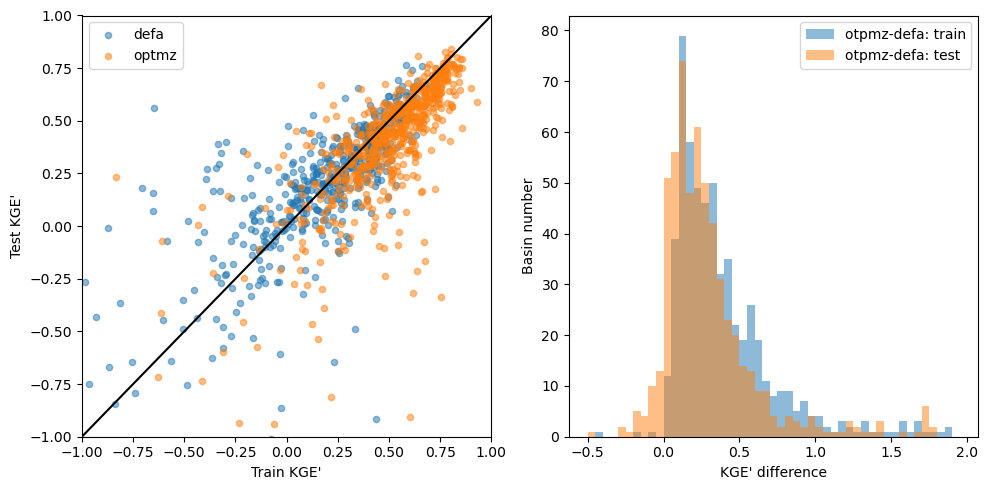

In [47]:
optmz_kge_train =  df_optmz[df_optmz['eval']=='train']['kge'].values
optmz_kge_test =  df_optmz[df_optmz['eval']=='test_5y']['kge'].values

defa_kge_train =  df_defa[df_defa['eval']=='train']['kge'].values
defa_kge_test =  df_defa[df_defa['eval']=='test_5y']['kge'].values


fig = plt.figure(figsize=[10, 5])

fig.add_subplot(1,2,1)
plt.scatter(defa_kge_train, defa_kge_test, 20, label='defa', alpha=0.5, )
plt.scatter(optmz_kge_train, optmz_kge_test, 20, label='optmz', alpha=0.5, )
plt.plot([-1,1],[-1,1], 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Train KGE'")
plt.ylabel("Test KGE'")
plt.legend()

fig.add_subplot(1,2,2)
plt.hist(optmz_kge_train - defa_kge_train, np.arange(-0.5, 2, 0.05) , label='otpmz-defa: train', alpha=0.5, )
plt.hist(optmz_kge_test - defa_kge_test, np.arange(-0.5, 2, 0.05) , label='otpmz-defa: test', alpha=0.5, )
plt.xlabel("KGE' difference")
plt.ylabel('Basin number')
# plt.plot([0,0],[0, 20], 'k')
plt.legend()

plt.tight_layout()
plt.show()